In [1]:
import torchvision
import matplotlib.pyplot as plt
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import random_split
root = './MNIST/'



In [2]:
dataset = torchvision.datasets.MNIST(root = root, train = True, transform = transforms.ToTensor())

train_size=0.9*len(dataset)
val_size=0.1*len(dataset)
train_dataset, val_dataset = random_split(dataset, [int(train_size),int(val_size) ])

In [43]:
input_size=784
inner_size=128
output_size=64
cat_size=10

class reference_nn(nn.Module):
    def __init__(self):
        super(reference_nn, self).__init__()
        self.flatten=nn.Flatten()
        self.relu_stack=nn.Sequential(
                nn.Linear(input_size,inner_size),
                nn.ReLU(),
                nn.Linear(inner_size, cat_size),
                # nn.ReLU(),
                # nn.Linear(output_size,cat_size),
                # nn.Softmax()
        )
    
    def forward(self, x):
        x=self.flatten(x)
        x=self.relu_stack(x)
        return x
    

In [44]:
model = reference_nn()
for p in model.parameters():
    p.requires_grad = True

In [45]:
model

reference_nn(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=10, bias=True)
  )
)

In [46]:
lr = 0.01
iteration = 0
steps=50000
loss_steps=50

# for img, label in train_dataset:
for i in range(steps):
    len_dataset=len(train_dataset)
    index = torch.randint(low=1, high=len_dataset, size=())
    row=train_dataset.__getitem__(index)
    # print(img)
    # print(label)
    out=model.forward(row[0])
    # loss = nll_loss(out,label)
    loss = F.cross_entropy(out.squeeze(),torch.tensor(row[1]))
    # loss=F.nll_loss(out.squeeze(),torch.tensor(row[1]))
    # print(loss)
    

    for p in model.parameters():
        p.grad = None

    loss.backward()

    #update parameters
    for p in model.parameters():
        p.data += -lr*p.grad
        # print(p.data,'*****************', p.grad)

    if i % 5000 == 0:
        print(f'loss = {loss.item()}')

    if i % 5000 == 0:
        # print(loss)
        with torch.no_grad():
            losses=torch.zeros(loss_steps)
            for j in range(loss_steps):
                index2 = torch.randint(low=1, high=len_dataset, size=())
                row_loss=train_dataset.__getitem__(index2)
                out_loss = out=model(row_loss[0])
                losses[j] = F.cross_entropy(out_loss.squeeze(),torch.tensor(row_loss[1]))
                # losses[j] = F.nll_loss(out_loss.squeeze(),torch.tensor(row_loss[1]), reduction='sum')
            print(f'loss = {losses.mean()}')
            

    if i >=1000000:
        break

loss = 2.421225070953369
loss = 2.293924331665039
loss = 0.03874831274151802
loss = 0.5641096830368042
loss = 0.008056524209678173
loss = 0.2339446246623993
loss = 0.018248993903398514
loss = 0.29236647486686707
loss = 0.0029667671769857407
loss = 0.27665361762046814
loss = 5.769562994828448e-05
loss = 0.20653143525123596
loss = 0.011927947402000427
loss = 0.051590584218502045
loss = 0.039083003997802734
loss = 0.1491791158914566
loss = 0.0015425699530169368
loss = 0.23782414197921753
loss = 0.3266736567020416
loss = 0.29499179124832153


tensor([[ 3.6072,  6.4402,  2.2406,  5.1061,  3.6727, 14.6332,  5.9396,  2.3988,
          1.1703, -0.7150, -1.4897, -0.2572, -0.4459, -0.9544, -0.7964, -0.9591,
         -0.6712, -0.2258, -0.3578,  0.0525, -0.5897, -0.7403, -1.1722, -0.8476,
         -0.8254, -1.2614, -0.2777, -0.5400, -0.3789, -0.8311, -0.9581, -1.2010,
         -0.6795, -0.9851, -0.5143, -0.1043, -1.4727, -0.4688, -1.1205, -0.5959,
         -0.7447, -1.3399, -1.2768, -0.5041, -0.9765, -0.7415, -0.3949, -0.0321,
         -0.0447, -0.8814, -0.0989, -0.8222, -0.5357, -0.8900, -0.9372, -0.0376,
         -1.0799, -1.6189, -0.5954, -0.3856, -1.2283, -1.2079, -0.3176, -0.4483]])
<class 'torch.Tensor'>
5


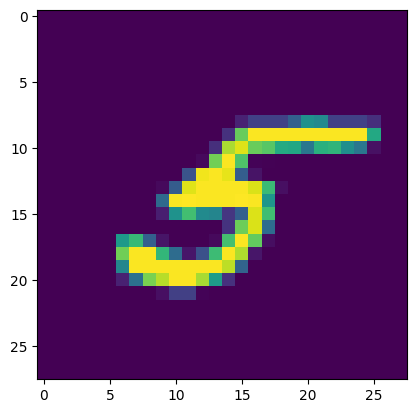

In [42]:
x= val_dataset.__getitem__(65)
with torch.no_grad():
    output =model(x[0])
    print(output)
    print(type(output))
    print(torch.argmax(F.softmax(output,1)).item())
plt.imshow(x[0].squeeze());

In [30]:
F.softmax(torch.tensor([-4.3836, -0.6722, -2.1300,  9.6365, -4.3640,  2.8266, -5.5407, -0.8063,1.3958,  4.1595]))

/tmp/ipykernel_2219351/2347934225.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(torch.tensor([-4.3836, -0.6722, -2.1300,  9.6365, -4.3640,  2.8266, -5.5407, -0.8063,1.3958,  4.1595]))


tensor([8.1043e-07, 3.3155e-05, 7.7168e-06, 9.9441e-01, 8.2647e-07, 1.0966e-03,
        2.5480e-07, 2.8994e-05, 2.6223e-04, 4.1585e-03])

In [54]:
torch.argmax(F.softmax(torch.tensor([-4.3836, -0.6722, -2.1300,  9.6365, -4.3640,  2.8266, -5.5407, -0.8063,1.3958,  4.1595])))

/tmp/ipykernel_170875/3224145034.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  torch.argmax(F.softmax(torch.tensor([-4.3836, -0.6722, -2.1300,  9.6365, -4.3640,  2.8266, -5.5407, -0.8063,1.3958,  4.1595])))


tensor(3)